# Example of ode Singular Perturbation
$$\left\{
        \begin{array}{ll}
            \dot{x}(t) &= x(t), \quad\quad\quad x(0)=x_0\\
            \varepsilon \dot{y}(t) &= x(t)-y(t), \quad y(0)= y_0 
        \end{array} 
        \right.
$$ 

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


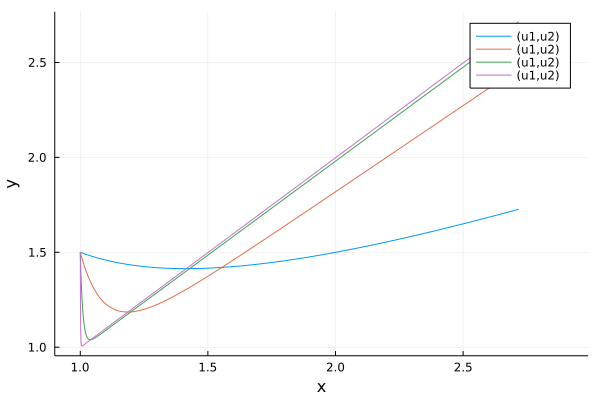

In [1]:
using LinearAlgebra
using DifferentialEquations
using Plots
using LaTeXStrings

function rhs(xy,par,t) 
    ε = par[1]
    return [xy[1] ; (1. /ε)*(xy[1]-xy[2])]
end

tspan = (0., 1.)
xy0 = [1., 1.5]
p1 = plot()
Par = [1., 0.1, 0.01, 0.001]
for ε in Par
    par = [ε]
    ode = ODEProblem(rhs, xy0, tspan, par)
    algo = Tsit5()
    RelTol = 1.0e-6
    AbsTol = 1.0e-6
    sol = solve(ode, algo, reltol = RelTol, abstol = AbsTol)
    p1 = plot!(p1, sol,vars = [(1,2)], xlabel = "x", ylabel = "y", legend = true)
end
plot(p1, labels=[L"$\varepsilon=1.$" L"$\varepsilon=0.1$" L"$\varepsilon=0.01$" L"$\varepsilon=0.001$"])

[1.0, 1.5]
[1.5, 0.7]
[2.0, 2.5]
[2.5, 1.5]


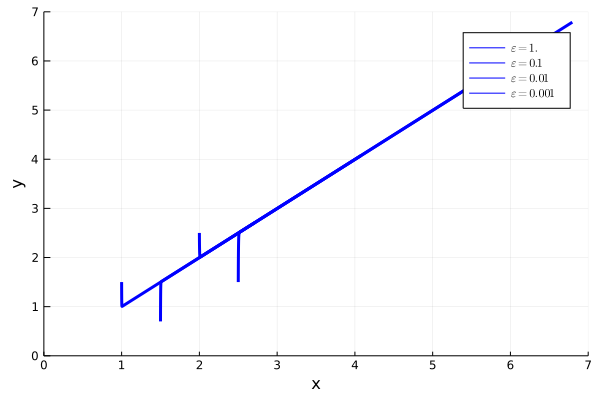

In [20]:
XY0 = [[1., 1.5], [1.5, 0.7], [2., 2.5], [2.5, 1.5]]
p1 = plot()
par = [0.001]
for xy0 in XY0
    ode = ODEProblem(rhs, xy0, tspan, par)
    algo = Tsit5()
    RelTol = 1.0e-6
    AbsTol = 1.0e-6
    sol = solve(ode, algo, reltol = RelTol, abstol = AbsTol)
    p1 = plot!(p1, sol,vars = [(1,2)], xlabel = "x", ylabel = "y", color=:blue, lw=3)
end
plot(p1, xlims = (0.,7), ylims = (0.,7), labels=[L"$\varepsilon=1.$" L"$\varepsilon=0.1$" L"$\varepsilon=0.01$" L"$\varepsilon=0.001$"])